In [2]:
import numpy as np
from scipy.interpolate import interp1d,krogh_interpolate,CubicSpline
import matplotlib.pyplot as plt
import matplotlib
import scipy.special as special

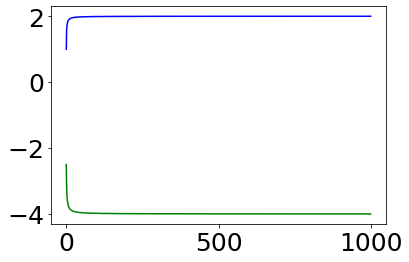

In [59]:
from optim import *

gen=residual_wrapgen(shift_wrapgen(jacobi_basegen(1/2,0),2/1,-1))
a,b=[],[]
for _ in range(1000):
    x,y,_=next(gen)
    a.append(x)
    b.append(y)
    
plt.plot(a,c='b')
plt.plot(b,c='g')

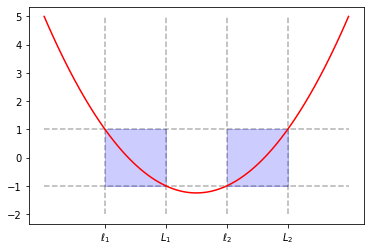

In [29]:
##$\sigma_2$ from (Goujaud, 2021)

l1,L1=2,4
l2,L2=6,8
rho=(L2+l1)/(L2-l1)
R=(l2-L1)/(L2-l1)
m=((np.sqrt(rho**2-R**2)-np.sqrt(rho**2-1))/np.sqrt(1-R**2))**2
sigma= lambda x: 2*(((1+m)/2/np.sqrt(m))**2)*(1-x/L1)*(1-x/l2)-1


x=np.linspace(0,10,100)
plt.plot(x,sigma(x),c='r')
plt.hlines([-1,1],0,10,linestyles='dashed',color='k',alpha=0.3)
plt.fill_between(np.linspace(l1,L1),-1,1,alpha=0.2,color='b')
plt.fill_between(np.linspace(l2,L2),-1,1,alpha=0.2,color='b')
plt.xticks([l1,L1,l2,L2],[r'$\ell_1$',r'$L_1$',r'$\ell_2$',r'$L_2$'])
plt.vlines([l1,L1,l2,L2],-2,5,linestyles='dashed',color='k',alpha=0.3)

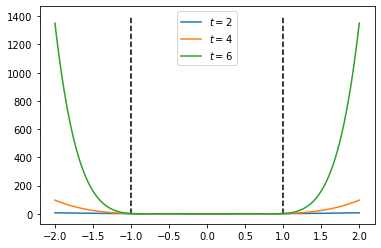

In [10]:
## chebyshev polynomials

x=np.linspace(-2,2,100)
for t in np.arange(2,8,2):
    y=special.eval_chebyt(t,x)
    plt.plot(x,y,label=r'$t= %s$' %(t))
plt.vlines([-1,1],0,1400,linestyles='dashed',color='k')
plt.legend()

([<matplotlib.axis.XTick at 0x22c3c696dc0>,
 [Text(-1.0, 0, '0.0'),
  Text(-0.5, 0, '0.25'),
  Text(0.0, 0, '0.5'),
  Text(0.5, 0, '0.75'),
  Text(1.0, 0, '1.0')])

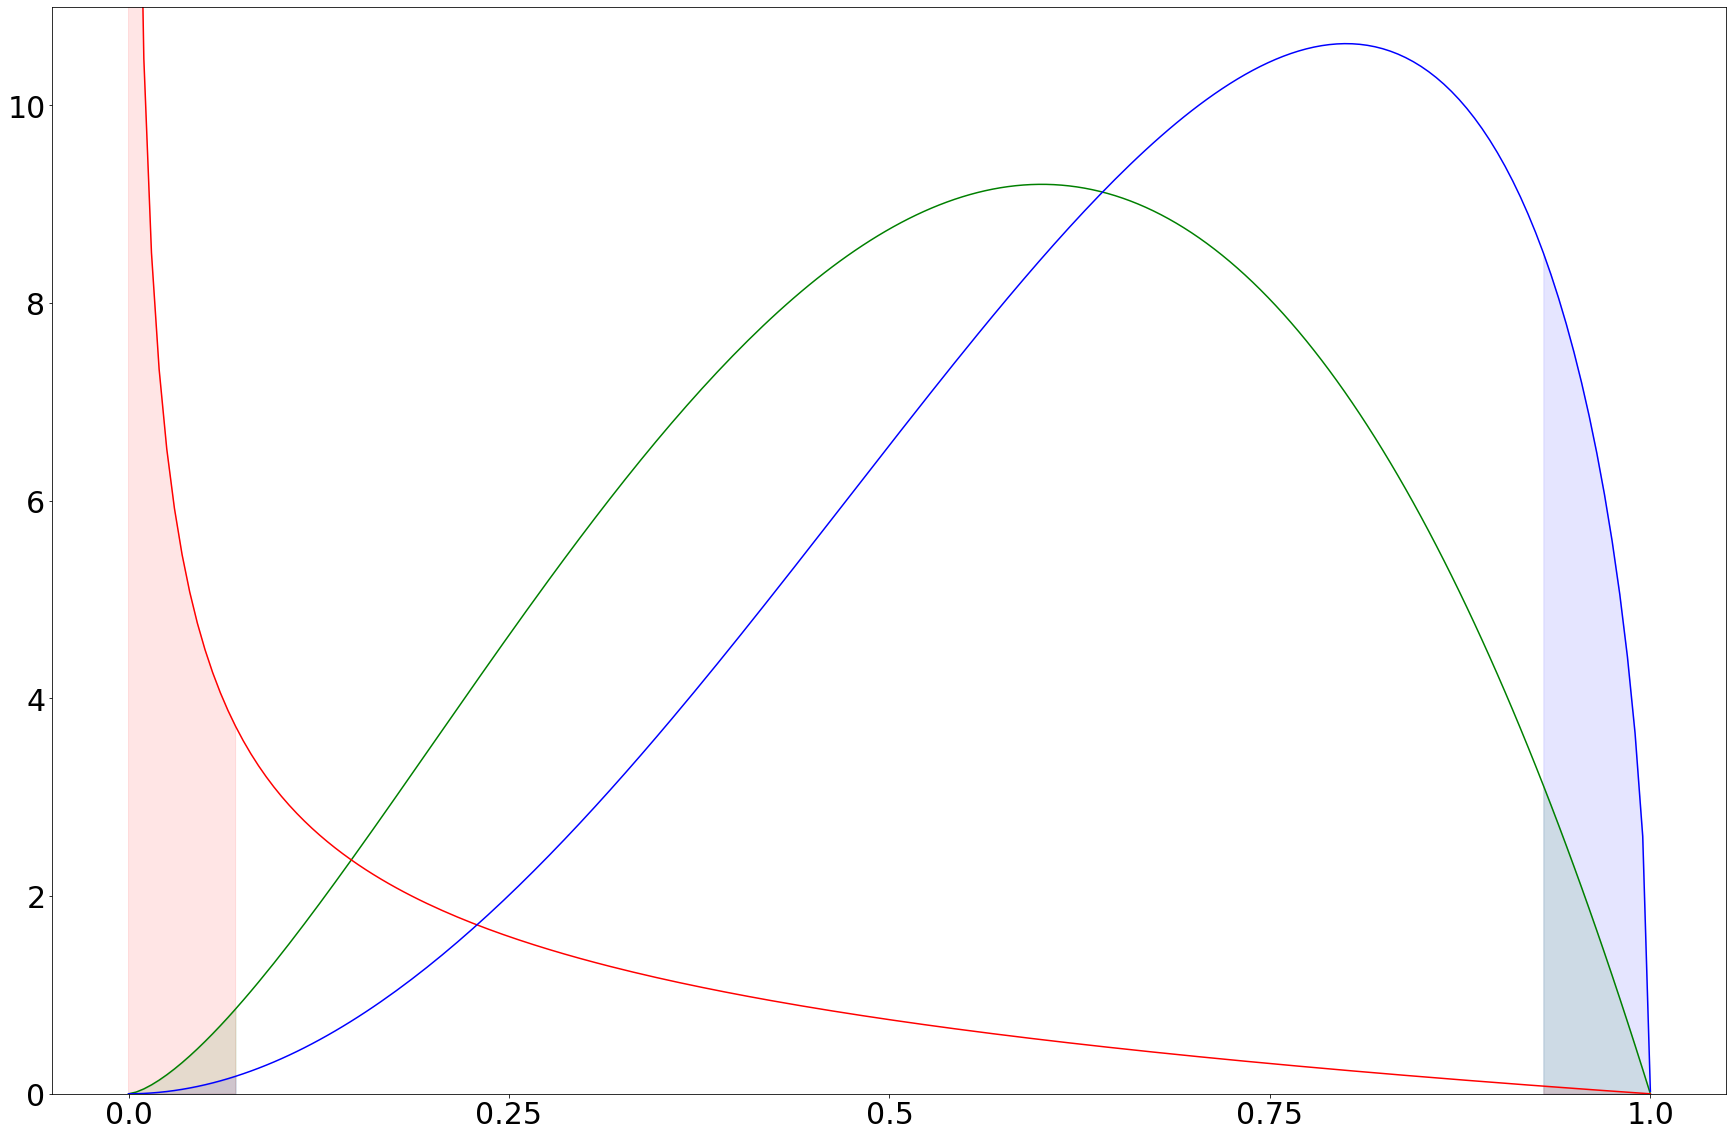

In [7]:
from scipy.special import beta as fbeta
matplotlib.rcParams.update({'font.size': 30})

eps=1e-6
area_idx=10 ##actually interpolate index
true_area_idx=15
t=np.linspace(-1+eps,1-eps,200,endpoint=True)
y1=((1-t)**0.5)*((1+t)**(2))/fbeta(3,1.5)
y2=((1-t)**1.0)*((1+t)**(-0.5))/fbeta(0.5,2)

t2=np.concatenate((t[:area_idx],t[-area_idx:]))

y3=((1-t)**1.0)*((1+t)**(1.5))/fbeta(2.5,2)


plt.figure(figsize=(30,20))
c1,c2,c3='b','r','g'
plt.plot(t,y3,c=c3)
plt.plot(t,y2,c=c2)
plt.plot(t,y1,c=c1)
alpha=0.1
plt.fill_between(t[:true_area_idx],y1[:true_area_idx],color=c1,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y1[-true_area_idx:],color=c1,alpha=alpha)

plt.fill_between(t[:true_area_idx],y2[:true_area_idx],color=c2,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y2[-true_area_idx:],color=c2,alpha=alpha)

plt.fill_between(t[:true_area_idx],y3[:true_area_idx],color=c3,alpha=alpha)
plt.fill_between(t[-true_area_idx:],y3[-true_area_idx:],color=c3,alpha=alpha)
plt.ylim(0,11)
plt.xticks(np.linspace(-1,1,5),[str(t) for t in np.linspace(0,1,5)])



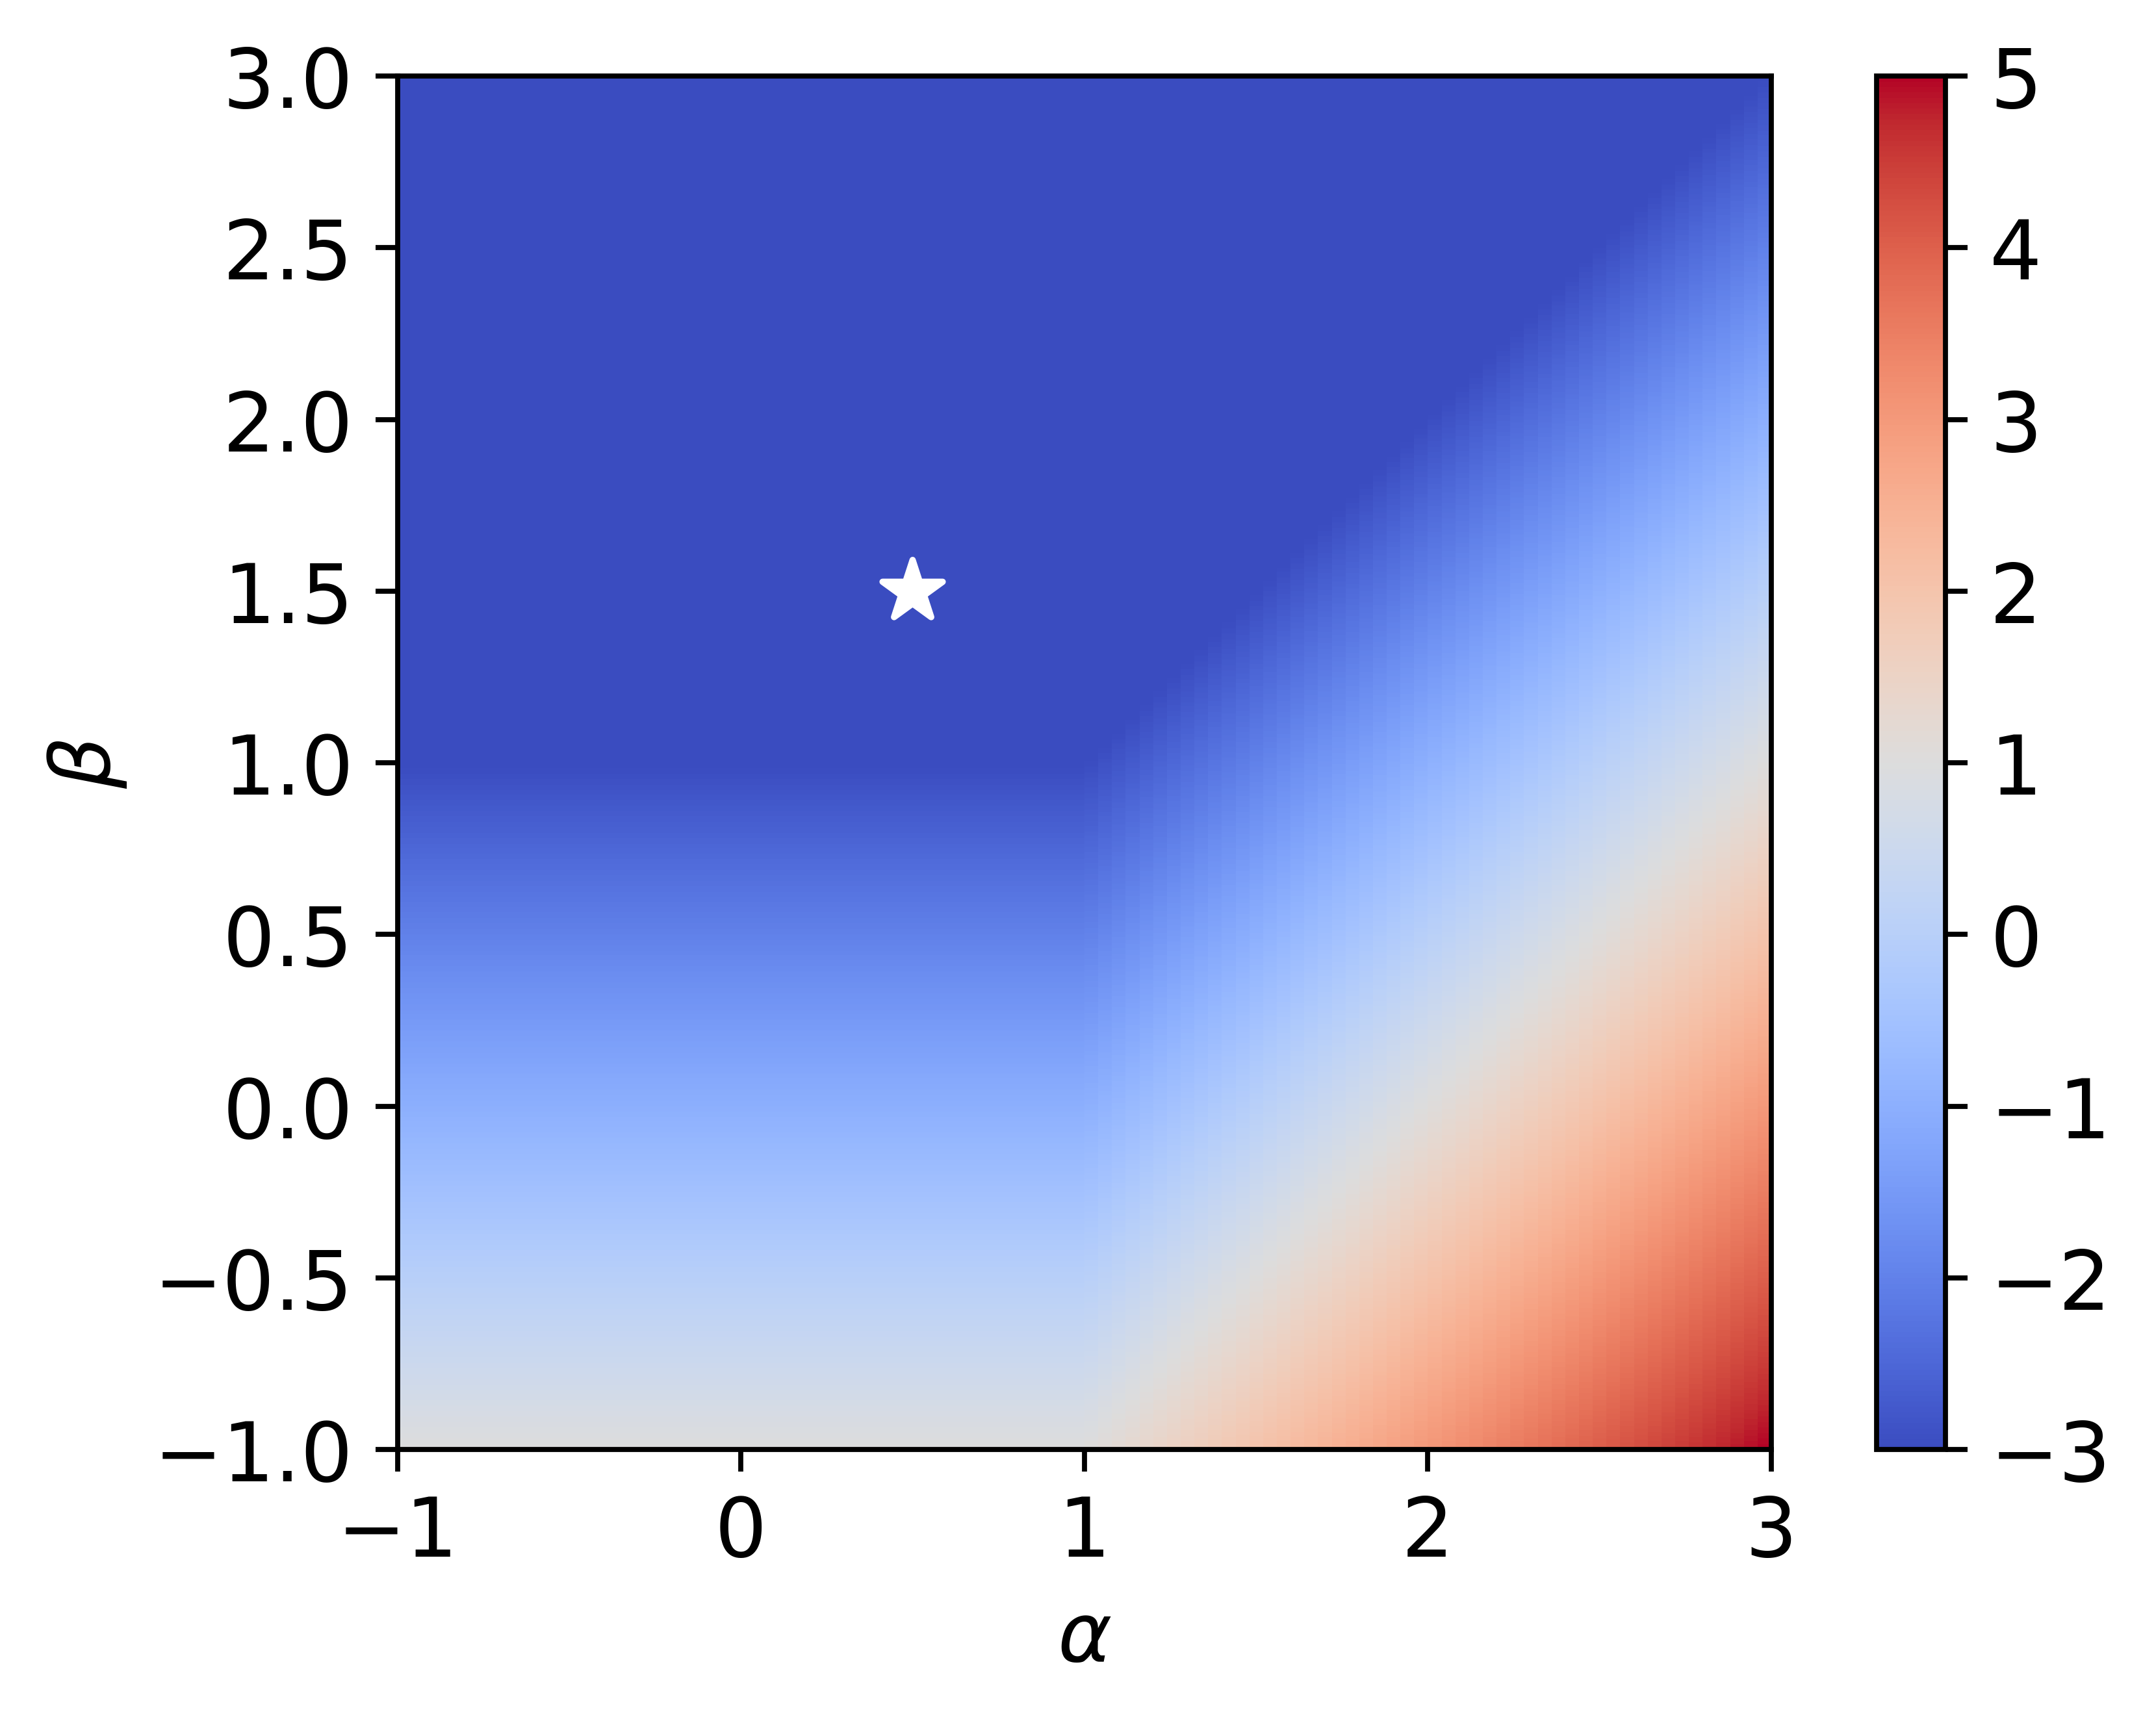

In [72]:
def rates(xi,tau,alpha,beta):
    if alpha<tau+1/2 and beta<xi+1/2:
        return -1-2*beta
    if alpha==tau+1/2 and beta==xi+1/2:
        return -2*(xi+1)
    return 2*(max(alpha-beta-tau,-xi)-1)
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

plt.figure(dpi=700)

N,M=100,1000
xi,tau=1/2,0.5
alpha_axis=np.linspace(-1,3.0,N)
beta_axis=np.linspace(-1,3.0,M)
im=np.zeros((M,N))
extent=[alpha_axis[0],alpha_axis[-1],beta_axis[0],beta_axis[-1]]
for i in range(N):
    for j in range(M):
        im[j,i]=rates(xi,tau,alpha_axis[i],beta_axis[j])

        
#plt.xticks([0,1,2,3,4])
im=plt.imshow(im,origin='lower',interpolation='nearest',extent=extent,cmap='coolwarm')
plt.scatter([1/2],[3/2],s=100,marker='*',c='w',label='optimum')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.colorbar(im,shrink=1.0)
plt.savefig('rates.pdf')


In [49]:
rates(xi,tau,-1,-1)

1

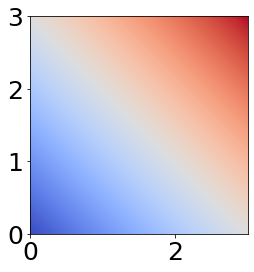

In [41]:
im=np.zeros((N,M))
extent=[beta_axis[0],beta_axis[-1],alpha_axis[0],alpha_axis[-1]]
for i in range(N):
    for j in range(M):
        im[i,j]=i+j

im=plt.imshow(im,origin='lower',interpolation='nearest',extent=extent,cmap='coolwarm')


In [25]:
rates(0,tau,1/2,1)

-2

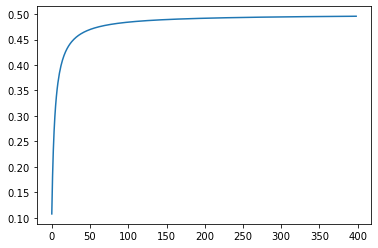

In [51]:
##checking norm of the standard jacobi polynomials
##done in log scale for numerical stability reasons
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAnkAAAISCAYAAACwOtk4AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8vihELAAAACXBIWXMAAAsTAAALEwEAmpwYAAA7d0lEQVR4nO3de7RlVX3g+++viocWFCqUgiBQkqhtxHQUIjFRG0OHgNfg6Cg9TFC0W1PeGDNGq4AvjNWa2EZgYK4m6ZTRDr7Td5jHjRGlsXEEjYZguF6IAjEBTUAiCvKqKqiq87t/rHU4q/bZZ+3H2fvsM9f+fsbY46y911xzzb3qQP3qt+b8rchMJEmS1C0bZj0ASZIkTZ5BniRJUgcZ5EmSJHWQQZ4kSVIHGeRJkiR1kEGeJElSBxnkSZIkddABsx6AJElSiSLimcAvACcBTwYeCxwG3AvcCHwW+P3MvGsm4yulGPJaXMiIOBK4AHghcBywC/h74DLgQ1nKxZIkSVMXER8Afq3x0W5gD7C58dn3gbMy8ytrOTYoK8ib6oWMiJOAzwNH1B/dDzyCpWznFXXfD47atyRJ6p6IOBd4HPAl4MbM/GH9+aHAi4GLqJJS3wOenJn3rOn4CgrypnYhI+JRVNnAo+qfL8/MayPiIOBXgEuBA6kyha+d2JeSJEmdFRGnUyWQAF6WmR9f0/OXEuQNspoLGRHvAi6kuj37tMy8pWf/W4B3A/uAH8vMmyczakmS1FURcRiwmHR6c2b+9lqev0ura7/a2H7CiMeeW//8VG+AV3s/1e3bjcA5Y4xNkiTNn+c2tv9xrU/epSBvrAsZEU+hWmQBcHm/Npl5P3B1/fb0sUYnSZI6LyIOjoitEfE64KP1x98C/mKtx1J0CZWIOBh4PNVq2HfWH496IU9sbN/Q0u4G4Ezgx0YZoyRJ6r6I2A0c3GfXl4FfnsXCzSKDvAlfyKMb27e1tFvcd1hEHFpn9yRJ0gyctOGQvDf3TaXvb/Hg31NV8Vi0IzN3DDjsDqqqHIcCh9SfXQVckJnfmfwoBysyyGOyF7JZgmVnS7vmvs1Uc/T2ExHbgG0ABz/ykJOOOf7fPLxvmPUt/dr0ftavm3H67ntIb5s+HS/rZ6hzD+6n9+T9r8XgL9HbZqh++hjvXIP/APtei94PFnqO6f+nJUnryoM772DPQ/fEWp3v3tzH+w44fip9v3Dvzbsz8+RRjsnMrYvbEfE44OXA24BrIuI3M/M3JjvKwYoM8tbjhazHtQPYAfAjTz053/Phax7et7fPPzb2Lez/30K/Nr2f7Vvo02bvMG1y5Da97wH27etts7yjYdr0fravZ0B79yw/ZmFZm+UXbHk/y9v0ftbbb9Vm78ht9j60Z1mb5WPu06bnD3n5uafzL1VJmqSvX71t1kNYNzLze8AlEXE18BXg7RFxTWZ+Zi3HUfzCi8z8XmZeApxBlRR5e0S8cIQu7mtsb2pp19x334qtJEnS9AXEgTGV16Rk5jVU9X2hvtO3looP8hat4kLe3tg+pqXd4r57nY8nSdJsRQQbDpjOa8IW5/T/6KQ7HqQzQV5tnAvZXFF74oqtlvZ9Y6QRSZKkeXZC/XPN7wIWOSevxcgXMjNviojvUNXKOwP4v3vbRMQhLNXhu2K1g5QkSasUEAfOLlcVERuBhWxZzRcRpwHPqt9+cS3G1VREJi8iNkZEa/50lRfyI/XPl0bE1j77f41qJe8+YE2fOydJktalY4HrIuI1EXFCM06JiGMj4s3AnwMB3AVcutYDLCLIY5UXMiK2R0TWr619+r+YqizLJuAvI+Kk+riDIuJXgXfV7Xb43FpJktaBYD3Myfu3wH+netLW7oi4MyLuB74D/DeqMm+3AP8+M++Y9CUYpKTbtYsXEuChiLgXeCRLdfKgupAvHvVCZuY99Yrcz1M90eLaiLiPqhbfgXWzK4DXr2L8kiSpO24H/iNwKnAK1RO4tlDd9fsO8HWqBNQnMnPXLAZYSpA39QuZmV+LiKcBb6J6TNqxwANUCzMuAz6cmX2qy0mSpDVXl1CZlcx8iGoe/7K5/OtFEUHeai9kZm4Htg/R7l+BN9QvSZK0Ti2WUNHKSpmTJ0mSpBEUkcmTJEnaz4xv15bATJ4kSVIHmcmTJEnlqUuoaGVm8iRJkjrITJ4kSSpOALHRTF4bgzxJklSegA0Gea28XStJktRBZvIkSVKBgthgJq+NmTxJkqQOMpMnSZLKExAbzVW18epIkiR1kJk8SZJUnMDVtYMY5EmSpPIELrwYwNu1kiRJHWQmT5IkFSi8XTuAmTxJkqQOMpMnSZKKE+GzawcxkydJktRBZvIkSVKRYoO5qjYGeZIkqTyWUBnIEFiSJKmDzORJkqQCWUJlEDN5kiRJHWQmT5IkFSeckzeQmTxJkqQOMpMnSZKKZAmVdgZ5kiSpPN6uHcgQWJIkqYPM5EmSpAJZQmUQM3mSJEkdZCZPkiQVxxIqg5nJkyRJ6iAzeZIkqUiWUGlnkCdJksrj7dqBDIElSZI6yEyeJEkqUJjJG8BMniRJUgeZyZMkSUUyk9fOTJ4kSVIHmcmTJEnFqYohm6tqY5AnSZKK5LNr2xkCS5IkdZCZPEmSVJ6whMogZvIkSZI6yEyeJEkqkgsv2nl1JEmSOshMniRJKk5VQsU5eW0M8iRJUpEM8tp5u1aSJKmDzORJkqQChQsvBvDqSJIkdZCZPEmSVB4XXgxkJk+SJKmDzORJkqQCOSdvEIM8SZJUppjt7dqIOAI4CzgNeCZwPFVsdSdwLXBZZv7prMZXTJA3zQsZEduBdwzR9EmZ+a1xziFJkjrnDvaPpXYDe4Bj6teLIuJy4CWZuXOtB1dMkMfaXMg9wF0t+/eO2a8kSZqgdfLEiwOAa4A/Aj6fmf8EEBFbgQuBVwFnAn8AvHytB1fSzezFC/la4Ecy85GZeSjwROBDdZvFCzmuv87Mo1pet67qG0iSpC752cw8JTN/fzHAA8jMWzPz1SzFJC+LiGPXenAlBXnr+kJKkqS1FRs2TOU1rMy8akCTDzW2Tx7rS65CMUHeer+QkiRJPXY3tjeu9clLmpM3yEwvpCRJWkMR62FO3iCnNravX+uTdynIO7WxPe6FfFpE3AD8CLAPuA34K+D3MvO61Q1PkiRN0nqukxcRjwbeUr+9OjNvWusxrN+rM4IJXsgtwFOBncDBwJOBVwNfi4jfXO04JUlSEbZExLWN17ZRDo6IDcBHgccDDwK/Po1BDlJ8Jm9CF/IfgAuAPwduycw9EXEQVXbw3cBJwNsi4u7MvKRlLNuAbQBbjjxujGFIkqRhTfF27fczczXz+38HeGG9/drM/PoExjSyLmTyVn0hM/PjmXlRZt6cmXvqzx7KzCuA5wB/WzfdHhGPaulnR2aenJknH/aYx446DEmSVLiIuBh4Xf329Zn54VmNpeggby0uZGbuBt5avz2U6okbkiRphhaLIU/jNf6Y4r3AG+u352fm+ybxXcdV7O3aNb6QX2lsnzDF80iSpAJFxEXAefXbCzLz4lmOBwoN8tbjhZQkSWspYJ2srq3vLC4mni7IzItmOZ5FxQV5M7qQP9XYvmUNzidJkgaImH2dvJ645Ly2BZprbX2EwEPqcyFXHeDFgN+QiDgY+K367QPAF1Z7TkmSVL6I+G2W4pI3rKcADwoK8lZzISNie0Rk/dras/t5EXFlRLwsIp7QOObAiDgNuBo4pf74nZn5w/G/hSRJmoiY7bNrI+I4qvJrAAvAmyLijpbXeS3dTUURt2tXuJBvajnk4hHm6QXVitnT6nPtosrYPQo4sHHO92Tme0cduyRJ6qQNPdtHDmh/6BTH0lcRQR7TvZDXUy3ieDbwdKqnXjya6qkX36DK5O3IzDV/5pwkSVrJbJ9dm5m3UiWK1q0igrzVXsjM3A5sX2HfD4B1dQ9dkiRptYoI8iRJkvYTrJsSKuuVQZ4kSSrSLG/XlsAQWJIkqYPM5EmSpOIEQYS5qjZeHUmSpA4ykydJksoTgHPyWpnJkyRJ6iAzeZIkqUjDPoJsXhnkSZKkIllCpZ0hsCRJUgeZyZMkSeWJAEuotPLqSJIkdZCZPEmSVCTn5LUzkydJktRBZvIkSVKZLKHSyiBPkiQVJyKI8HZtG0NgSZKkDjKTJ0mSyuTt2lZeHUmSpA4ykydJkopkCZV2ZvIkSZI6yEyeJEkqj481G8ggT5Iklcnbta0MgSVJkjrITJ4kSSpSeLu2lVdHkiSpg8zkSZKk8gTOyRvATJ4kSVIHmcmTJEkFCsLHmrUyyJMkSWUKb9e2MQSWJEnqIDN5kiSpPAF4u7aVV0eSJKmDzORJkqQChXPyBjCTJ0mS1EFm8iRJUpEsodLOIE+SJJUnAJ9d28qrI0mS1EFm8iRJUoHCZ9cOYCZPkiSpg8zkSZKk4gQQzslr5dWRJEnqIDN5kiSpPIFz8gYwyJMkSQUKS6gM4NWRJEnqIDN5kiSpTD67tpWZPEmSpA4ykydJksrks2tbeXUkSZI6yEyeJEkqT7i6dhCvjiRJUgeZyZMkSWWyGHIrgzxJklQmb9e28upIkiR1kJk8SZJUJoshtyomkxcRR0TEf4qIj0XENyLigYh4MCL+JSL+LCL+wwTOcWREXBIRN0XEroi4KyKujohXR/ibJEmSKhGxKSLOjIgLI+JPIuLbEZH1a/usxwdlZfLuYP/x7gb2AMfUrxdFxOXASzJz56idR8RJwOeBI+qP7gc2A8+pX2dHxFmZ+eD4X0GSJE1ExKyLIT8L+OwsBzBIMZk8qgDvGuC1wI9k5iMz81DgicCH6jZnAn8wascR8SjgM1QB3o3AT2bmZuAQ4HVUweTpwKWr/RKSJKkz7ga+AFwE/BJVQmrdKCmT97OZeVXvh5l5K/DqiNgLvAZ4WUS8NTP/eYS+zwOOAnYBL8jMW+q+HwJ+NyIOA94NbIuI92Xmzav8LpIkabVmO5Pq6sw8vPlBRLxnVoPpp5hMXr8Ar8eHGtsnj9j9ufXPTy0GeD3eT3X7diNwzoh9S5KkaYgN03kNITP3TfnbrVoxQd4Qdje2Nw57UEQ8BTiufnt5vzaZeT9wdf329LFGJ0mStIZKul07yKmN7etHOO7ExvYNLe1uoJrz92Mj9C1JkqZh9gsv1r1OXJ2IeDTwlvrt1Zl50wiHH93Yvq2l3eK+wyLi0BH6lyRJWnPFZ/IiYgPwUeDxwIPAr4/YxebGdlvplea+zVRz9HrHsg3YBrDlyON6d0uSpEma3sKLLRFxbeP9jszcMa2TTUvxQR7wO8AL6+3XZubXZzWQ+hdgB8CPPPXknNU4JEnSqnw/M0ddxLnuFB3kRcTFVHXsAF6fmR8eo5v7GtubgHtXaLdphWMkSdIsDLkSdl4VG+RFxHuBN9Zvz8/M943Z1e2N7WNYOcg7pv55b73adqANG5aSeQfQL6Xcm+wbM+3c+6e4t1+bnr739kk09rYZSr//wBaGaDO63q81qV/evperp/e9fVr1tunb90N7eo45cOD5h/njXNi37lfuS9KUxazr5K17RYbAEXERcH799oLMvHgV3TVX1J64Yqulfd9YxbkkSZLWRHFBXn2L9rz67QWZedFq+qtX4n6nfnvGCuc8BHhu/faK1ZxPkiRNQFCVUJnGqyOK+iZ1gLd4i/a81QZ4DR+pf740Irb22f9rwKHAPuDjEzqnJEnS1BQzJy8ifpulAO8NmXnpCMduB95Rv31i/bzbpouBV1M9v/YvI+LczPxaRBwEvAp4V91ux7DPrY1IDti4NO+t/7yv3rkE/RbkjjHfoN+f6rKJX3367Z2nN9YcPVj+b4feOXr92oyu/zWdjOXz5Jb33DtPb5w5etVx+8/TG2buYW8b5+hJmjcJ5Izn5EXEY9j/KVuLf7ltiogtjc93Dzuff5KKyORFxHHABfXbBeBNEXFHy+u8lu6Wycx7qMqw/IDqiRbXRsS9VLXwfg84iOo27esn9Z0kSVLxrgPubLyOrT8/v+fzD8xicKVk8jb0bB85oP3IT6SoM3dPA95EFfAdCzxAtTDjMuDDmdkvJSVJktZcWEJlgCKCvPr26tg52czcDmwfot2/Am+oX5IkaT2bcZCXmVtnOoABDIElSZI6qIhMXokCOGBD+5PNlk+wt2DyanWxYPIwC0wsmCxpHs164cV6ZyZPkiSpg8zkSZKk8oQLLwbx6kiSJHWQmbwpCWDjgDl5vSyY3LZ/PF0omNw7R6//uQePzzl6kjrHOXmtDPIkSVKZOvSc2Wnw6kiSJHWQmTxJklSgsITKAGbyJEmSOshM3rQEHLChuZhgvHh6fgsm93tM8HwWTO5diFEdY8FkSXMusITKAF4dSZKkDjKTJ0mSipRm8loZ5EmSpAKFdfIGMMibkiDZEEvz1fafn7do9H+BzE/B5H7XxoLJDx9jwWRJ0gAGeZIkqUjerm3n1ZEkSeogM3mSJKlMzslrZSZPkiSpg8zkTUmw/2KLvQvL4+nlizEsmNxuPgsmj7MQozrOgsmSOizCYsgDGORJkqTiJPjs2gEMgSVJkjrITJ4kSSqTt2tbGeRNS8AB0Zgz1uf3sHeengWTRzUfBZN75+j1a9O3XwsmS9JcM8iTJElFynEXEc4J85ySJEkdZCZPkiQVKHys2QAGeZIkqUwGea0M8qYkSDY0Fl70vdA9v5sWTG7ZP7TuFUzut8jCgsmSpEEM8iRJUnnCYsiDmOeUJEnqIDN5kiSpOOnCi4EM8qZoY3M+XZ+pYcsuvgWTG/v7nHtOCyb379eCyZKkdgZ5kiSpTM7Ja2WQJ0mSiuTt2nZeHUmSpA4ykydJkgoUPrt2AIO8KQmSjY1iyMPM/7dgcnN/n34tmNzSrwWTJUn7M8iTJElFck5eO6+OJElSB5nJkyRJ5QksoTKAQd6URMDGGDAHaYipYXNbMLnvyS2YPFq/FkyW1GVBekOylVdHkiSpg8zkSZKk4iSQ3q5tZSZPkiSpg8zkSZKkIllCpZ1B3tQkG5qT94fJKFswudnxECe3YPJo/VowWZLmiUGeJEkqko81a2eQJ0mSChTerh3AqyNJktRBZvKmJIADGsWQ+9XtHWuengWTB5y8ewWTpzVHr+rbgsmSymUJlXZm8iRJkjrITJ4kSSpO4sKLQczkSZIkdZCZPEmSVJ5wde0gxQR5EbEJ+HfAScAz65/H1bv/a2ZuX0Xf24F3DNH0SZn5reF6TTZGv6nuS5atCbBg8mjmpGDyMIWFJ9W3BZMllWQ93K6NiM3AG4EXA08E9gE3A58C3p+ZD81qbMUEecCzgM9O+Rx7gLta9rdHbZIkaW5ExPHAF4Gt9Uc7gYOBk+vXORFxWmbePYvxlRTkAdwN/F3jdSlw1AT7/+vMPHWC/UmSpCmZ5e3aiNgI/AVVgPdd4NzMvDIiNgBnAx8EngF8HHjBLMY4VJAXEQcDPw88FvgO8KXM3DXNgfVxdWYe3jOu96zxGCRJkgBeCTy93n5xZn4FIDMXgD+ug71PAGfW2bwvrPUABwZ5EbEF+BLwpMbHD0XEx4C3Z+Yddbv/AvyfwKOAfwb+F/ChzPynSQw0M4uaiBMkG5pztAbMzwMLJu9vzHkWFkyeaL9V3xZMlrQ+zXhO3ivqn1ctBng9PgX8FtU8vXOBNQ/yhvkb50LgyVR/694M3El1v/k/A1+NiBMi4nzgkrrdkVT3od8M3BgRvzmNgUuSJM1CvRj0Z+q3l/drk5kJfK5+e/pajKvXMEHeGVRplldk5lOBx1PdW74ZOJbqXvObqYLA/wVsA94OXEf1D/G3RMTvTH7oU/G0iLghInZFxP0RcVNEfDAinjHrgUmSpCVJVUJlGq8hPJWlGOqGlnaL+46KiMNb2k3FMN/kWKo7JB+DKjLNzM8BzwX+iWrV66OBvwbOyMw/zMzfysyTgXOAXcDrIuKnpjD+SdtC9Qe3uDrmycCrga+ZkZQkaX1JYiqvIRzd2L6tpV1z39ErtpqSYabybAAerNOOD8vM70fEe4E/oMr0faBPm0/Wy4vfDfwK8NXJDHvi/gG4APhz4JbM3BMRBwGnUo39JOBtEXF3Zl4ybKcbszF7KPpc6nHm6c1NLb1xJygu63iIk1tLb5S+13stPefoSVoDmxvbO1vaNfdtXrHVlAzzt8ttwCERcUKffX/W2P7bFY7/YP3zOSOMa01l5scz86LMvDkz99SfPZSZV1CNe/G7bY+IR63UT0Rsi4hrI+Lau+5qK7cnSZJWKyOm8gK2LP59Xr+2zfq7jmOYIO8qqhTKf+vdkZl3Ag/Wb/umKzPzB8C9wDFjjnGmMnM38Nb67aHAaS1td2TmyZl58uGHr/mtd0mSNBnfX/z7vH7t6Nl/X2N7U0s/zX33rdhqSoYJ8i4FHgJeEhGfi4hn9ex/KnBOHQwtExEHAIdQXuHlpubS6H4ZTUmStMYyYyqvIdze2G5LYjX33b5iqykZGORl5jeo6t8l8HPAVyLi9oj404h4G/BvaK/98hJgI/CvExivJEnSrH2TpUnWJ7a0W9x3R2au+TyuobJrmflHEXEj8B7geVSPEnsRcNZim4i4DbgW+Fr9uhb4CeD3qALEKyc58DXWXBl8yzAHBMmGQfWbexdjWDC5MZZ+X8qCyaOY14LJ/cbnYgypi6rHDsxCZu6MiC9TVRo5A7iot01EBNXTwgCuWMPhPWzo/+9n5leBUyPiWOD5wE9SrTr9cap7zk+oXy/qOTSo/hb764g4MjPXVUYvIqJ3VXDP/oOpKlYDPMAMKlZLkqT9JTN/4sVlVEHe8yPilMz8m579Z7M0xesjazqy2sghcGb+c2Z+JDN/PTN/GjiM6tltrwD+L+DLVMFQsJRq2QDsAG6PiNsi4jMR8a6I+MVRzh0Rj4mILYuvxvg3NT+PiEN7jtseEVm/tvZ0+7yIuDIiXhYRT2gcc2BEnAZcDZxSf/zOzPzhKGOWJEmddBlwPVWs8+k6ZiAiNkTE2SxVF7l8Fs+thQncwakfxPv39euj8HCK8slUmb5n1j9/guq5to9n6akZCyOO4Trg+D6fn1+/Fl1G9eDgYQTVitnFP5xdVEHqo+Dhe0ULwHsy870jjFWSJE3RLDN5mbk3Is6iqkKyFbgyInZSJaAeUTe7jurBEDMxlRWv9e3Pm+rXJxY/j4gfZSnoOwlYD48Lux44D3g2VUZyC9UTPHYC36DK5O3IzOtH6jVz/2LIw7Bg8lK/fT6b34LJ05mjB90smDzMH6dz9CRNQmbeGhE/ThVH/CLwRGAPVeLrk8D7M/OhWY1vTcuaZOa3gG8B/3PM47eOedx2YPsK+34ADP0UC0mStD7MeE5eNYbM+4B31K91ZTbLUiRJkjRVJRcoliRJcyvWRSZvPTPIkyRJRRry6RRzyyBvSoJk40Jjuve4N8YtmLzU77KxzEvB5Mlcv366WDB5mAUmFkyWNA8M8iRJUnHWQTHkdc+FF5IkSR1kJk+SJBXJTF47g7wpilya47NxUtOqLJi81G+fz7pZMHmIPwgLJjeOOXB5m2XnHjw+5+hJKp1BniRJKpKZvHYGeZIkqUBhCZUBXHghSZLUQWbyJElScRJY8HZtK4O8KYlMNu5bmhC+b+PyNssWY1gwuf2gIVgwua3NeEormNy7EKM6xoLJkuaPQZ4kSSqSCy/aOSdPkiSpg8zkSZKk8iSurh3AIG9qkg2NYsj0mcrTO0/PgsmNY5bN0VvpZO0smDyozegsmLzEOXrSbHm7tp23ayVJkjrITJ4kSSqQxZAHMZMnSZLUQWbyJElScRLn5A1ikDctmcS+pWnaG/oUQ+5djGHB5Ma5F5Z/0bktmDzWQgyY14LJ4yzEqI6zYLKkbjHIkyRJRXJOXjuDPEmSVKR+9ye0xIUXkiRJHWQmb0oC2JBLM3YW+kzTWTZPz4LJrcfMbcHkfpMjLZjc6Ld9jl6/Nn37tWCyVBxv17YzkydJktRBZvIkSVJxkrCEygBm8iRJkjrITJ4kSSqSc/LaGeRNTbKhUQyZPoWOexdjWDB5Sd9fzHktmNxvkYUFk1v6Xd6zBZOlbvJ2bTtv10qSJHWQmTxJklSehIV+d5P0MDN5kiRJHWQmb0oik9i3NKenbzTdM7/OgskNfb7D3BZM7ntyCyaP1q8Fk6WuSZyTN4iZPEmSpA4ykydJkopkCZV2BnmSJKlI6cKLVt6ulSRJ6iAzeVOTRL+VFA3LImwLJi8ZYv7/3BRMHmbmvgWTR+zXgslS+YIFF160MpMnSZLUQWbyJElScRIXXgxiJk+SJKmDzORNS08x5GFYMHkACyY3Ox7i5BZMHq1fCyZLpXF1bTuDPEmSVCSfeNHO27WSJEkdZCZPkiSVJ2HB27WtzORJkiR1kJm8KRpUDHkYc1sweZyFGGDB5NaTWzB5tH4tmCytZ5ZQGcxMniRJUgeZyZMkSUWyhEo7gzxJklQkn13bziBvWjKJvY1ZNBO60vNSMLlf3d75LZg85v/E5rRg8rTm6FV9WzBZUjkM8iRJUpG8XdvOhReSJEkdZCZPkiQVJwlLqAxQTCYvIjZFxJkRcWFE/ElEfDsisn5tn9A5joyISyLipojYFRF3RcTVEfHqiPA3SZIkTcU04pySMnnPAj47rc4j4iTg88AR9Uf3A5uB59SvsyPirMx8cKgOM2Hf0uTqvhHitBZjWDB5SScKJo+7CmVZx0OcvPyCycMUFp5U3xZMlmaoe481m3icU0wmr3Y38AXgIuCXgDsm0WlEPAr4DFWAdyPwk5m5GTgEeB2wBzgduHQS55MkSauXOZ3XDE00zikpk3d1Zh7e/CAi3jOhvs8DjgJ2AS/IzFsAMvMh4Hcj4jDg3cC2iHhfZt48ofNKkiTBFOKcYjJ5mTnNew7n1j8/tRjg9Xg/1e3bjcA5UxyHJEkaUhJTec3ku0whzikpkzcVEfEU4Lj67eX92mTm/RFxNXAm1W3bdwzuOWHAXJhlv0YWTG68H2OOHnSyYPLyOXpgweTRWDB5iXP0pPlRTCZvik5sbN/Q0m5x349NcSySJGkISbXwYhqvrjDIg6Mb27e1tFvcd1hEHDrF8UiSJK3a3N+upSqTsmhnS7vmvs1Uc/T2ExHbgG0Axz7u8N7dkiRpgqa4EnZLRFzbeL8jM3dM7WxTYpA3QfUvwA6Ak550fMbepTk1w/weWkuvoXeOHsxtLb3+876spbca1tJb4hw9lWyKQd73M/PktgYR8Urgf6ziHGdm5udWcfxA3q6F+xrbm1raNffdt2IrSZKkdcBMHtze2D4GuHeFdsfUP+/NzGW3aiVJ0trJhIXZPrv2k1QPUhjXPZMayEoM8vZfUXsi8M0V2i2uwv3GdIcjSZLWu/oxp8M96nRG5v52bWbeBHynfntGvzYRcQjw3PrtFWsxLkmS1K6DjzWbKDN5lY8AFwIvjYh3ZeatPft/DTiUatnBx4fqMXO/lQz91gyMtRjDgsmN9xZMXhqLBZNXa14LJvcbn4sxpG4oKpMXEY+JiC2LL5bGv6n5eW8du4jYHhFZv7b26fpiqocAbwL+MiJOqo87KCJ+FXhX3W6Hz62VJGl96Fomb9w4ZyVFBXnAdcCdjdex9efn93z+gVE6zcx7gBcCP6B6osW1EXEvVS283wMOorpN+/rVfwVJkjQJHXzixUTjnNKCvKnJzK8BTwMuBf4BOBB4APgS8CtU9WzW9QRLSZKkRUXNycvMrWMetx3YPkS7fwXeUL9WKaFRDLnfle6dUmbB5BFZMHmp3z6fzW/B5OnM0YNuFkwe5o/TOXpajxLI2ZZQmbhx45yVmMmTJEnqoKIyeZIkSQB0rNzJNJjJkyRJ6iAzeZIkqUgzXgm77hnkTUlmko2FF8MsmLBg8qCTD6GTBZPHuxjzWzB5UtW3l+tiweRhFphYMFnrUbXwYtajWN+8XStJktRBZvIkSVKRzOS1M5MnSZLUQWbypiWBxpyVoaZ9WTB5qdtJTavqQMHk5XP0VjpZu/kpmDzEH4QFkxvHHLi8zbJzDx6fc/Q0Cy68aGcmT5IkqYPM5EmSpPJYDHkggzxJklScBBb6zWbRw7xdK0mS1EFm8qYlk9zTXgx5qLn9c1owuXchBsxvweTehRhgweTRWTB5xX57FmJUx1gwWWXwdm07M3mSJEkdZCZPkiQVyUxeOzN5kiRJHWQmb1oyRy6GbMHkhj5Teea2YHKfYyyYPKDNQBZMbu3XgskqQKbFkAcxyJMkSUVK79e28natJElSB5nJkyRJRTKR185MniRJUgeZyZuaJPcuTTset8TsvBZMXrYQA+a2YHLfPwYLJjfaTGIhBsxrweRxFmJUx1kwWbPnY83amcmTJEnqIDN5kiSpOJnOyRvEIE+SJBXJOnntDPKmJSH3ts81GafE7LwUTO6dowdzXDC5z3ewYHKzzYA5ev3aDGU+Cib3ztHr16ZvvxZMltY9gzxJklQkb9e2c+GFJElSB5nJkyRJRUon5bUykydJktRBZvKmJZPcs7yAaBsLJjf0KXQ8twWTh5j/b8Hk5v4+/VowuaXf5T1bMFklyHR17SAGeZIkqUguvGjn7VpJkqQOMpMnSZKKtOD92lYGeVOSmSzsXZpdMva0r95+J9RmvRdM7nu9LJi8xILJzY6HOLkFk0fr14LJUhcY5EmSpOIkzskbxDl5kiRJHWQmT5IklSfN5A1ikCdJkgqULBjltTLIm5ZMcu/S5OCJze3vd6oJtbFgcqPr9VQweZyFGDC/BZOHmblvweQR+7VgslQigzxJklSk7PdvKD3MhReSJEkdZCZPkiQVpyqh4py8NgZ5U5KZLOxZmn8yzZKpFkxu6GDB5H51ey2YPCILJk+hXwsmS+udQZ4kSSpPwoJz8loZ5EmSpCJ5u7adCy8kSZI6yEyeJEkqTgILJvJaGeRNSzJyMWQLJq+eBZNbWDC52fEQJ7dg8mj9WjBZWm8M8iRJUnkS0lReK+fkSZIkdZCZPEmSVCQX17YzyJuWTBb2LM0KGbcc6twWTJ7WHD0or2DyOHP0YI4LJo85T25OCyZPa45e1bcFkzVdC96ubeXtWkmSpA4qLsiLiM0RsT0iro+I+yPinoj424h4Y0QcNGaf2yMih3j96KS/jyRJGl1mTu3VFUXdro2I44EvAlvrj3YCBwMn169zIuK0zLx7zFPsAe5q2T/4vpkkSdKIIuII4CzgNOCZwPFUcdqdwLXAZZn5p6P0WUyQFxEbgb+gCvC+C5ybmVdGxAbgbOCDwDOAjwMvGPM0f52Zp65+tJIkadqyW8+uvYP947LdVMmnY+rXiyLicuAlmblzmA6LCfKAVwJPr7dfnJlfAcjMBeCP62DvE8CZdTbvC7MZZiUz2fdQe+JvnHKo81IweZh+x1VcweTehRhgweT9xjPWkqHB5qRg8jCFhSfVtwWTpVYHANcAfwR8PjP/CSAitgIXAq8CzgT+AHj5MB2WNCfvFfXPqxYDvB6fAm6pt89dmyFJkqRZWcicymtGfjYzT8nM318M8AAy89bMfDVVcAfwsog4dpgOiwjyImIT8DP128v7tclqpuTn6renr8W4JEmSJiEzrxrQ5EON7ZOH6bOIIA94KktjvaGl3eK+oyLi8DHO87SIuCEidtUrd2+KiA9GxDPG6EuSJE3RnK2u3d3Y7jeJaJlS5uQd3di+raVdc9/RtK+U7WcLcDjwQ+Aw4Mn161UR8e7MvHCUzrIxt2PfQ4PbWzC5nQWTGyyYvNTvsrGMPZt0MAsmT7Tfqm8LJms8mXNXDPnUxvb1wxxQSiZvc2O7bUVJc9/mFVst9w/ABcBTgEdk5hHAIcDPA1+j+hvhbRHxxrZOImJbRFwbEdf+YOfutqaSJElDiYhHA2+p316dmTcNc1wpmbypysyP9/nsIeCKiPgr4K+AnwS2R8QfZuY9K/SzA9gB8G+POmKu/nkhSdJam+Kd1S0RcW3j/Y767/g1V1cP+SjweOBB4NeHPbaUTN59je1NLe2a++5bsdUIMnM38Nb67aFURQolSVJ3fT8zT268lgV4EfHKIZ+WtdLrjCHH8jvAC+vt12bm14f9EqVk8m5vbB8D/H8rtDtmhWNWq1my5YRhDsiFZF9jjsjGPg9cG2ee3rzU0htrjl6ffsdlLb0W67yWXv95X9bSWw1r6S1xjt76kh2fkxcRFwOvq9++PjM/PMrxpQR536T6v9cG4ERWKKNS7wO4IzNHXXQhSZI0rE8Cn1nF8X2nfi2KiPcCi2sBzs/M9416giKCvMzcGRFfBp4LnAFc1NsmIoJqoQTAFRMewk81tm9ZsZUkSVoTOdvCxWTmg1Rz5CYuIi4CzqvfXpCZF4/TTylz8gAuq38+PyJO6bP/bJZupX5k2E7r4LBt/8HAb9VvHwBm+rg0SZJUyYWcymuW6lu0zQBvWWJrWKUFeddTTZz5dEScBtWqk4g4G/hg3e7y3ufWRsT2xkTHrT39Pi8iroyIl0XEExrHHFif42pgMah8Z2b+cOLfTJIkzb06wFu8RXveagI8KOR2LUBm7o2Is4CrgK3AlRGxkypQfUTd7DrgnBG7DqoVs4tB4y6qjN2j4OFZugvAezLzvSOMmIW9zUnQyycB9y7GsGByY3+fGdFzWzB57D8sCyY/3O+ysVgwebXmtWByv/G5GGN2Zp11m6SI+G2WArw3ZOalq+2zpEwemXkr8OPAO6keYZZU0dPXqFKbP5WZd4/Y7fX1sZ8GbgZ2AY+uf34d+ADwE5n5ttV/A0mSpP1FxHFUD2WA6l9mb4qIO1pe57V097BiMnmLMvM+4B31a9hjtgPbV9j3A+CSSYxNkiStkYQOJfI29GwfOaD9ocN0WlyQJ0mS1CX1ncpxC2auyCBvSqpiyM3ZG/0u9f7zQyyY3DBEbd95KZi8bI5e35MPwYLJS/32+Wx+CyZPZ44edLNg8jB/nM7RWxtJt+bkTYNBniRJKlCSM6yTV4KiFl5IkiRpOGbyJElSeRIWvF3bykyeJElSB5nJm6KFvYMm3/Zefgsmr7QfmNuCyb0LMcCCyfsdM4GFGDDPBZMntbJnuS4WTB5mgYkFk9eOc/LamcmTJEnqIDN5kiSpOJZQGcwgT5IklScN8gYxyJuS5cWQh2HB5JX29+1nXgom95nKY8HkxrkHztFb6WTt5qdg8jRn6O6vCwWTe+fo9T/34PE5R09rwSBPkiQVKFlw4UUrF15IkiR1kJk8SZJUJOfktTOTJ0mS1EFm8qYlx1l40c98FkweuwxtBwsmL1uIARZMbjmmdyEGWDB5dBZMXrHfh5b/P9iCybORWAx5EIM8SZJUHp9dO5C3ayVJkjrITJ4kSSqSCy/aGeRNSWayb8805lfMR8HkYaZ0zUvB5N45emDB5KZBc/TAgskD2wxkweTWfi2YrHXKIE+SJBUoXXgxgHPyJEmSOshMniRJKk4m5EK/qRdaZJAnSZKKZAmVdgZ5U5IJex9cq0mz3SuYPG6J2U4WTO5T6NiCyQ2DFmL0OcaCyS37hzafBZPHWYhRHWfBZK09gzxJklQkF160c+GFJElSB5nJkyRJ5cm0GPIABnnTksnC3qW5E4NnKE2SBZNHabPeCyb3vVYWTF4yxC+cBZObbQbM0evXZijzUTC5d45evzZ9+7VgsmbAIE+SJBUn8bFmgxjkSZKkIi2kdfLauPBCkiSpg8zkSZKk8qS3awcxyJuSXNi/GPIwE2iny4LJo7SxYHKj69IKJg/xC2fB5Ob+Pv1aMLml3+U9WzBZ65VBniRJKk5iCZVBnJMnSZLUQWbyJElSkXysWTuDvCnJTPbuap9zNMzciulZ3wWTx5721fPegslLLJjcYMHkASe3YPJo/VoweSYSFhYsodLG27WSJEkdZCZPkiQVyYUX7czkSZIkdZCZPEmSVJwkSR9r1sogb1oy2ben+cs3eEK5BZNX3r9SP4NYMLlhXgomj7MQA+a3YPIw/+OxYPKI/VowWeuDQZ4kSSqPjzUbyCBPkiQVySCvnQsvJEmSOshM3pTkAuzd2ZgJsWm8GXfzWjB5miVTiyuYPK05etDJgsn96vZaMHlEFkyeQr8WTJ68ZMGFF63M5EmSJHWQmTxJklScdOHFQGbyJEmSOshMniRJKlIuOCevjUHelORCsm/XgGLIyxZjWDB50TBT1eelYPIw/Y7LgsktLJjc7HiIk1swebR+LZi8at6uHcjbtZIkSR1kJk+SJBXIZ9cOYiZPkiSpg8zkTUnugz33DZrP0DMLwoLJDxu3HKoFk1enEwWTx5mjB3NcMHnMeXJzWjB5WnP0qr4tmDyKBBack9equExeRGyOiO0RcX1E3B8R90TE30bEGyOiTzgxUt9HRsQlEXFTROyKiLsi4uqIeHVEjDtjWJIkac0VlcmLiOOBLwJb6492AgcDJ9evcyLitMy8e4y+TwI+DxxRf3Q/sBl4Tv06OyLOyswHV/MdJEnSBGS3SqhExDOBXwBOAp4MPBY4DLgXuBH4LPD7mXnXsH0Wk8mLiI3AX1AFeN8Ffi4zDwE2AS8F7gOeAXx8jL4fBXyGKsC7EfjJzNwMHAK8jur+4+nApav+IpIkaQKSXJjOa0b+M7CdKtB7ClV8sws4HPhp4DeBmyLi2cN2WEyQB7wSeHq9/eLMvBIgMxcy84+B19T7zoyI00bs+zzgKKqL+YLMvLbu+6HM/F3gHXW7bRHx5FV8B0mSpH6uAc4Hng08JjMfmZmHUd1VfCVwJ7AF+LM6OTVQSbdrX1H/vCozv9Jn/6eA3wKeCJwLfGGEvs9d7CMzb+mz//3AW4FDgXNYCvpWtpDs2zlqGtmCyW3mtWDyWAsx+vQ7ruIKJvcuxAALJu83nrGWDA02JwWThyksPKm+LZg8WJdKqGTmR1b4/H7gsoj4LtW0sscBL2SIO5dFZPIiYhPwM/Xby/u1ycwEPle/PX2Evp8CHDeg7/uBq0ftW5IkaUK+2th+wjAHFBHkAU9laaw3tLRb3HdURBw+ZN8n9jm+re8fG7JfSZI0LfVjzTo0J2+Q5za2/3GYA0oJ8o5ubN/W0q657+gVW62u78Mi4tAh+5YkSRpLRBwcEVsj4nXAR+uPv0W1EHWgUubkbW5s72xp19y3ecVWk+n7/t4GEbEN2Fa/ffAX9t28lBm8r0+P/T6TVrYF+P6sB6FO8XdKk/SUtTxZkp0qodIUEbupSsT1+jLwy8OWcyslyCtCZu4AdgBExLWZefKMh6QO8XdKk+bvlCYpIq5dy/M9cM/Nn//yZ07dMqXuH9HzfXbUf8evlTuAR1At+Dyk/uwq4ILM/M6wnZQS5DVzXpta2jX3DZsn6+373gn2LUmSpiAzz5jl+SPilcD/WEUXZ2bm5/rtyMytjfM8Dng58Dbgmoj4zcz8jWFOUMqcvNsb28e0tGvuu33FVqvr+956ta0kSdJUZeb3MvMS4Ayqmkdvj4gXDnNsKZm8b1IVPdpAtRq2b6kTllbK3jHCYz+aK2pPrM/V1vc3hux3LdO6mg/+TmnS/J3SJM3b79MnqZ6WNa57RmmcmddExJeA51HN/x947qjKy61/EfFXVMuH/3dmLnuiRUQE1YqTE4CPZOYretu09P1tqlp5H87MV/XZfwjV/fFDgXdm5uBiyJIkSRMUEZ8Afgn4ZmYOLOlWyu1agMvqn8+PiFP67D+bKsAD6Fs1usVi+5dGxNY++3+NKsDbxxjPxpUkSZqAxThnqLUBpQV511M9b+fTi8+njYgNEXE28MG63eWZud8jzSJie0Rk/drap++LqTJ1m4C/jIiT6uMOiohfBd5Vt9uRmTdP+otJkqT5FREb6zuSbW1OA55Vv/3iMP0WE+Rl5l7gLOBWqkUQV0bEA8ADwP8EDgOuo3q27Kh930P1HLgfUD3R4tqIuJeqFt7vAQcBVwCvb+snIjbXAeX1EXF/RNwTEX8bEW+MiIPajpWaImJTRJwZERdGxJ9ExLcb/1DZPuvxqSwRcURE/KeI+FhEfCMiHoiIByPiXyLizyLiP8x6jCpLRDwzIt4REf9PRNwYET+IiD31zy9HxNtGePKU4Fjguoh4TUSc0Az4IuLYiHgz8OdUia67gEuH6bSYOXmLImIzcB7wi8ATqRZk3Ew1AfL9mbnsUff1X4qL8+iemJm3rtD3kcCbqAK+Y4HdVAszLqOar7di1cWIOJ4qst5af7ST6lHui8UMrwNOy8y7h/qimmsRcSpVTaR+/mtmbl+zwah4EbGH/Rfa7aaafnJI47PLgZdkZltReAmAiPgA1VSmRbuBPez/gIHvA2dl5lfWcmwlqu8y3tL46CGqkm6PZP//Tm8BXpyZ1w3Vb2lB3noUERupgrinA98Fzs3MKyNiA9VcwQ9S/eJfnpkvmN1IVYo6yPsT4O8ar0uBozDI04giIoFrgD8CPp+Z/1R/vhW4EFhccPaxzHz5LMaoskTEucDjgC8BN2bmD+vPDwVeDFwEPBb4HvDk+o6ZVlDf7XsRcCpwCvB4qifS7APuBL5Olcn7RGbuGrpfg7zVi4hXAX9Yv/3p3n+1RMQvAZ+o3/773jmDUq+I2JiZ+3o+uxU4HoM8jSginp+ZK2WGiYj/DrymfntcZv7z2oxMXRURpwOfr9++LDNdtDgDxczJW+cWy7VctUJa+lMspWHPXZshqWS9AZ60Gm0BXu1DjW0fc6ZJ+Gpj+wkzG8WcM8hbpYjYBPxM/bZvkeas0qWLjy45fS3GJUkj2N3Y3jizUahLntvY/seZjWLOGeSt3lNZuo43tLRb3HeUK44krTOnNravn9UgVLaIODgitkbE64CP1h9/C/iLGQ5rrpXyWLP17OjG9m0t7Zr7jqZaAi1JMxURjwbeUr+9OjNvmuFwVKCI2M1SJYmmLwO/nJkPrvGQVDOTt3rN5eJtpQea+zav2EqS1khdAeCjVCv5HgR+fbYjUqHuAP6Vqm7toquA/5KZ35nNkAQGeZI0z36Hqi4owGsz8+uzHIzKlJlbM/OozDwUOJKqlu1PANdExDtnOrg5Z5C3es3nx21qadfcN9Qz5yRpWiLiYuB19dvXZ+aHZzkedUNmfi8zLwHOABJ4e0S8cMBhmhKDvNW7vbF9TEu75r7bV2wlSVMWEe8F3li/PT8z3zfD4aiDMvMaqkLJANtmOZZ5ZpC3et+kerQawIkt7Rb33ZGZLrqQNBMRcRFwfv32gsy8eJbjUactLjj80ZmOYo4Z5K1S/ZzHL9dvz+jXpn7Q8M/Xb69Yi3FJUq/6Fu159dsLMvOiWY5HnXdC/dMpSjNikDcZl9U/nx8Rp/TZfzZLv+wfWZshSdKSOsBbvEV7ngGexhURG+vkRVub04Bn1W+/OPVBqS+DvMm4jKqAaACfrn+5iYgNEXE28MG63eU+t1bDiojHRMSWxRdL/71uan5ePxBcWlFE/DZLAd4b6onx0riOBa6LiNdExAnNgC8ijo2INwN/TvV34l3ApTMa59yL6olbWq2I2EpVF2hr/dFOqr+UH1G/vw44LTPvXvPBqUgRcStw/BBNL8vMV053NCpVRBwHfLt+uwDcOeCQi52npzb133e3ND56CLgXeCRwSOPzW4AXZ+Z1azc6NfnEiwnJzFsj4sep5rv8IvBEYA/w98Angfdn5kMzHKKk+bShZ/vIAe3NDGuQ24H/SPU4vFOoimlvAfYB3wG+TpXJ+0Rm7prRGIWZPEmSpE5yTp4kSVIHGeRJkiR1kEGeJElSBxnkSZIkdZBBniRJUgcZ5EmSJHWQQZ4kSVIHGeRJkiR1kEGeJElSBxnkSZIkdZBBniRJUgcZ5EmSJHWQQZ4kSVIHGeRJKl5EPCciPhURt0fEroi4MSLeFRGPrPefEBF7I+LmiNg46/FK0lo4YNYDkKRxRcTBwPuBX6k/2g0E8BTgQuBIYBvwVmAj8M7M3DeDoUrSmovMnPUYJGksEfFp4BeBe4BXA39KFeT9BvB2YAE4Efg68I/A0zJzYTajlaS1ZZAnqUgRcS5wWf32/8jMzzb2HQDcARwB/BXwPOClmfnHaz5QSZoRgzxJxYmIAG4CngR8OjNf0qfN3wDPqt/eAPx4+j88SXPEhReSSvRsqgAP4OIV2uxubG83wJM0bwzyJJXo5+qf3wX+ZoU2i/9/+3+BP5n2gCRpvTHIk1Sik+ufX27J0B1S/3yXWTxJ88ggT1KJttY/v91vZ0ScBjyjfnvzWgxIktYbgzxJJTqo/rns/2H1ytpLGx/tWZMRSdI6Y5AnqUTfq3/+VJ99bwWe3njvEy4kzSWDPEkl+t/1z2dHxJsj4sCIOCgi3gxsBx4AbqnbnDOLAUrSrFknT1JxIuKxwN8BT6g/Wnyc2cHALuBs4DTg9fX+O4GzMvOrazxUSZoZM3mSipOZd1Ldqv0Q8C9Ut2T3AV8FTs3Mv6TK6P0p1Zy8xwI3zmSwkjQjZvIkSZI6yEyeJElSBxnkSZIkdZBBniRJUgcZ5EmSJHWQQZ4kSVIHGeRJkiR1kEGeJElSBxnkSZIkdZBBniRJUgcZ5EmSJHWQQZ4kSVIH/f/JZwCt5gUzwQAAAABJRU5ErkJggg==
from scipy.special import loggamma
t=np.arange(1,400)
alpha=1/2,
beta=5/2
logrates=loggamma(t+alpha+1)+loggamma(t+beta+1)
logrates=logrates-loggamma(t)-loggamma(t+alpha+beta+1)
logrates-=np.log(2*t+alpha+beta+1)

plt.plot(np.exp(logrates))

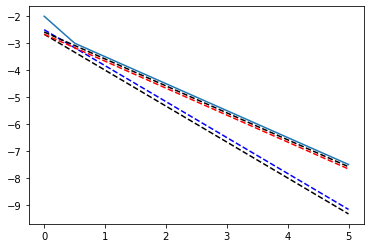

In [15]:

def nesterates(xi):
    if xi>1/2:
        return -(xi+5/2)
    return -2*(xi+1)
xis=np.linspace(0,5,100)

l1=-4/3*(xis+2)
l2=-30/12 -4/3*xis
l3=-(xis+8/3)
l4=-(xis+31/12)

plt.plot(xis,l1,'--',c='k')

plt.plot(xis,l2,'--',c='b')

plt.plot(xis,l3,'--',c='r')

plt.plot(xis,l4,'--',c='k')
plt.plot(xis,[nesterates(t) for t in xis])